# **Convergence module**

A variety of tools for the purpose of inspecting the convergence of different calculations by plotting the results in a digestible way. All the tools can be targetd to matplotlib axes so that you can build your own complex figures. Installing **ipympl** is suggested so that plots become dynamic objects where you can zoom in.

**<font color='red'>So far the code has tools for the convergence analysis of:</font>**
### **I. Self-consistent calculations:**
Given a folder with the quantum-espresso outputs it gives tools for the convergence analysis of various quantities respect to the **cutoff**, **Kgrid** and **smearing**. It plots against these quantities:
- Total energy.
- Internal atomic forces.
- Fermi level.

As well as keeping track of the computational requirements:
- Computational time
- Required RAM for the calculation

### **II. DFPT Phonons:**
Like the self-consisten convergence analyzer (also respect to cutoff, Kgrid and smeargin). But for the **phonon frequencies**.

### **III. Wannierizations done with wannier90:**
- Tools for the convergence analysis of the Wannier minimization, it plots these quantities as a function of the step number:
    - Total spread.
    - Disentanglement procedure.
    - Individual spreads.
    - Individual wannier centers.

---
>*The **documentation** of every function is accesible with the usual **shift + tab** shortcut.*
---

### *Expected folder structure:*

For the convergence analysis of **self-consistent** calculations and **phonons** the code expects for the outputs to be store in a certain structure:

#### 1. Cutoff convergence
The code expects the ouputs to be gathered in folders with the **Kgrid** written as ```N1xN2xN3``` and subfolders with the **cutoff** number for each Kgrid.  
For example:

- 3x3x3
    - 50
        - output
    - 60
        - output
- 4x4x4
    - 50
        - output
    - 60
        - output

#### 2. K grid convergence
Exactly the same as for cutoffs but the subfolders should be the **smering** number.

# **I. Self-consistent calculations**

In [16]:
from yaiv import convergence as conv

## 1. Cutoff

Submodule with the aim of converging your data respect to the **cutoff**. It has the following functions:
- **read_data:** Read the data from the corresponding folder. Then, you could make your own plots or further process the data and feed it later.
- reverse_data: Reformat data conviniently.
- energy_vs_cutoff: Self-explanatory...
- energy_vs_kgrid: Self-explanatory...
- **energy:** Both previous plots together in a figure for the convergence of the **total energy**.
- fermi_vs_cutoff: Self-explanatory...
- fermi_vs_kgrid: Self-explanatory...
- **fermi** Both previous plots together in a figure for the convergence of the **Fermi level**.
- forces_vs_cutoff: Self-explanatory...
- forces_vs_kgrid: Self-explanatory...
- **forces:** Both previous plots together in a figure for the convergence of the **atomic forces**.
- time_vs_cutoff: Self-explanatory...
- time_vs_kgrid: Self-explanatory...
- **time:** Both previous plots together in a figure for the convergence of the **computational time**.
- RAM_vs_cutoff: Self-explanatory...
- RAM_vs_kgrid: Self-explanatory...
- **RAM:** Both previous plots together in a figure for the convergence of the **RAM**.
- **analysis:** All the previous plots into a single figure.

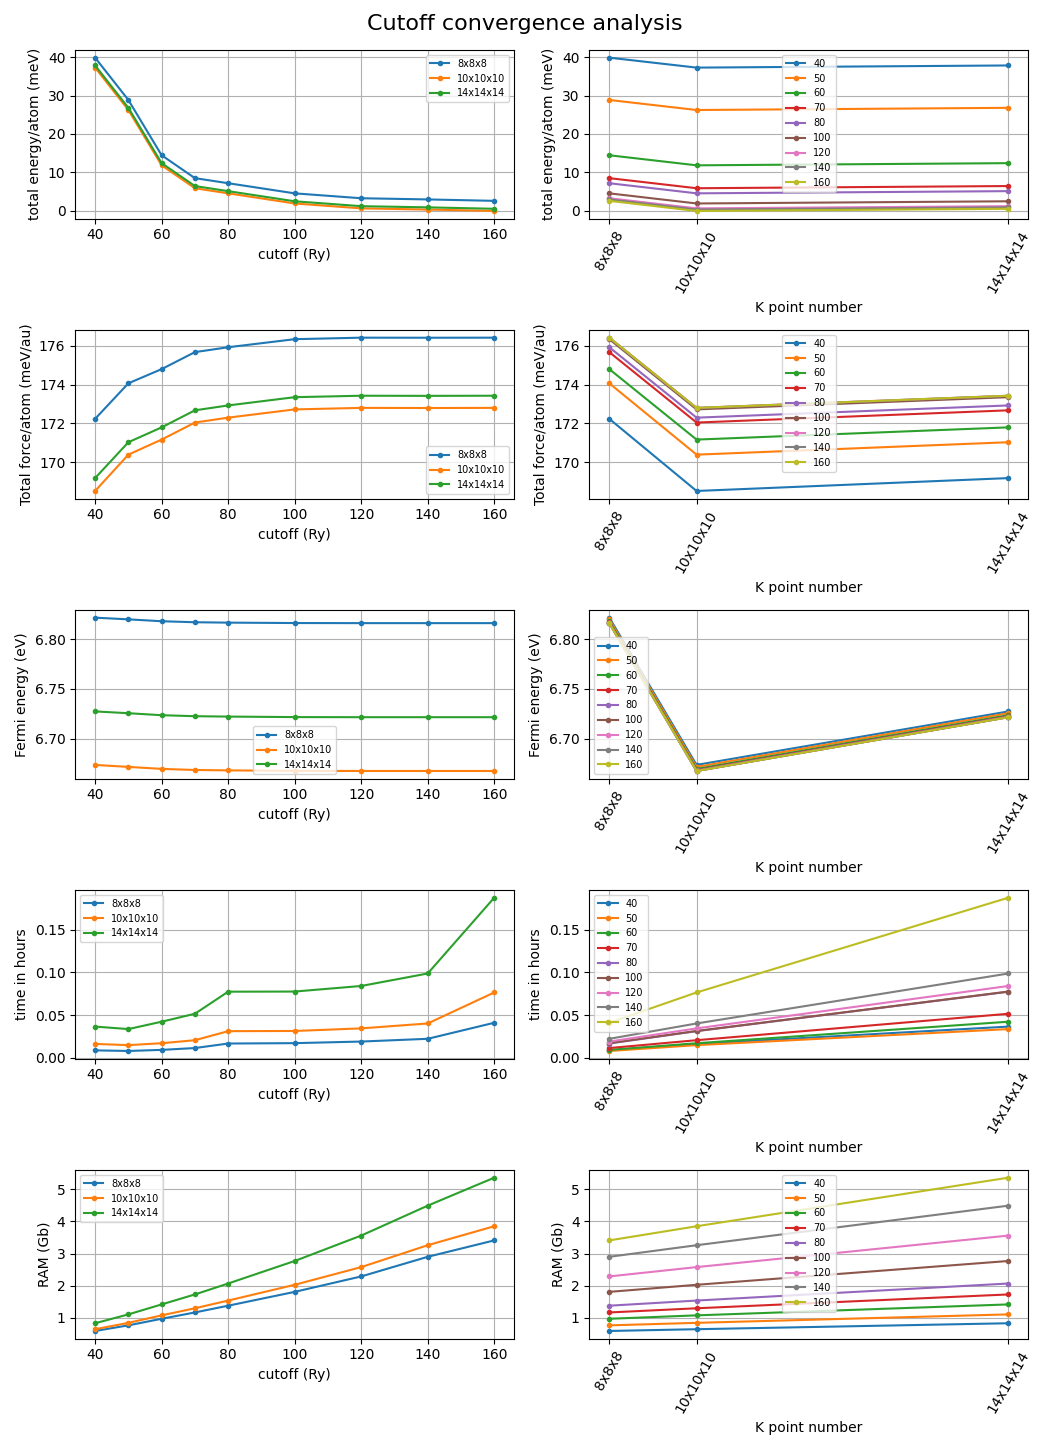

In [17]:
conv.cutoff.analysis('DATA/convergence/cutoff/',title='Cutoff convergence analysis')

## 2. Kgrid & Smearing

Submodule with the aim of converging your data respect to the **K-grid/smearing**. For the cases where the smearing has a physical value, as Fermi-Dirac smearing, it can plot a sencondary axis representing **temperature**. It has the following functions:
- **read_data:** Read the data from the corresponding folder. Then, you could make your own plots or further process the data and feed it later.
- energy_vs_smearing: Self-explanatory...
- energy_vs_kgrid: Self-explanatory...
- **energy:** Both previous plots together in a figure for the convergence of the **total energy**.
- fermi_vs_smearing: Self-explanatory...
- fermi_vs_kgrid: Self-explanatory...
- **fermi** Both previous plots together in a figure for the convergence of the **Fermi level**.
- forces_vs_smearing: Self-explanatory...
- forces_vs_kgrid: Self-explanatory...
- **forces:** Both previous plots together in a figure for the convergence of the **atomic forces**.
- time_vs_smearing: Self-explanatory...
- time_vs_kgrid: Self-explanatory...
- **time:** Both previous plots together in a figure for the convergence of the **computational time**.
- RAM_vs_smearing: Self-explanatory...
- RAM_vs_kgrid: Self-explanatory...
- **RAM:** Both previous plots together in a figure for the convergence of the **RAM**.
- **analysis:** All the previous plots into a single figure.

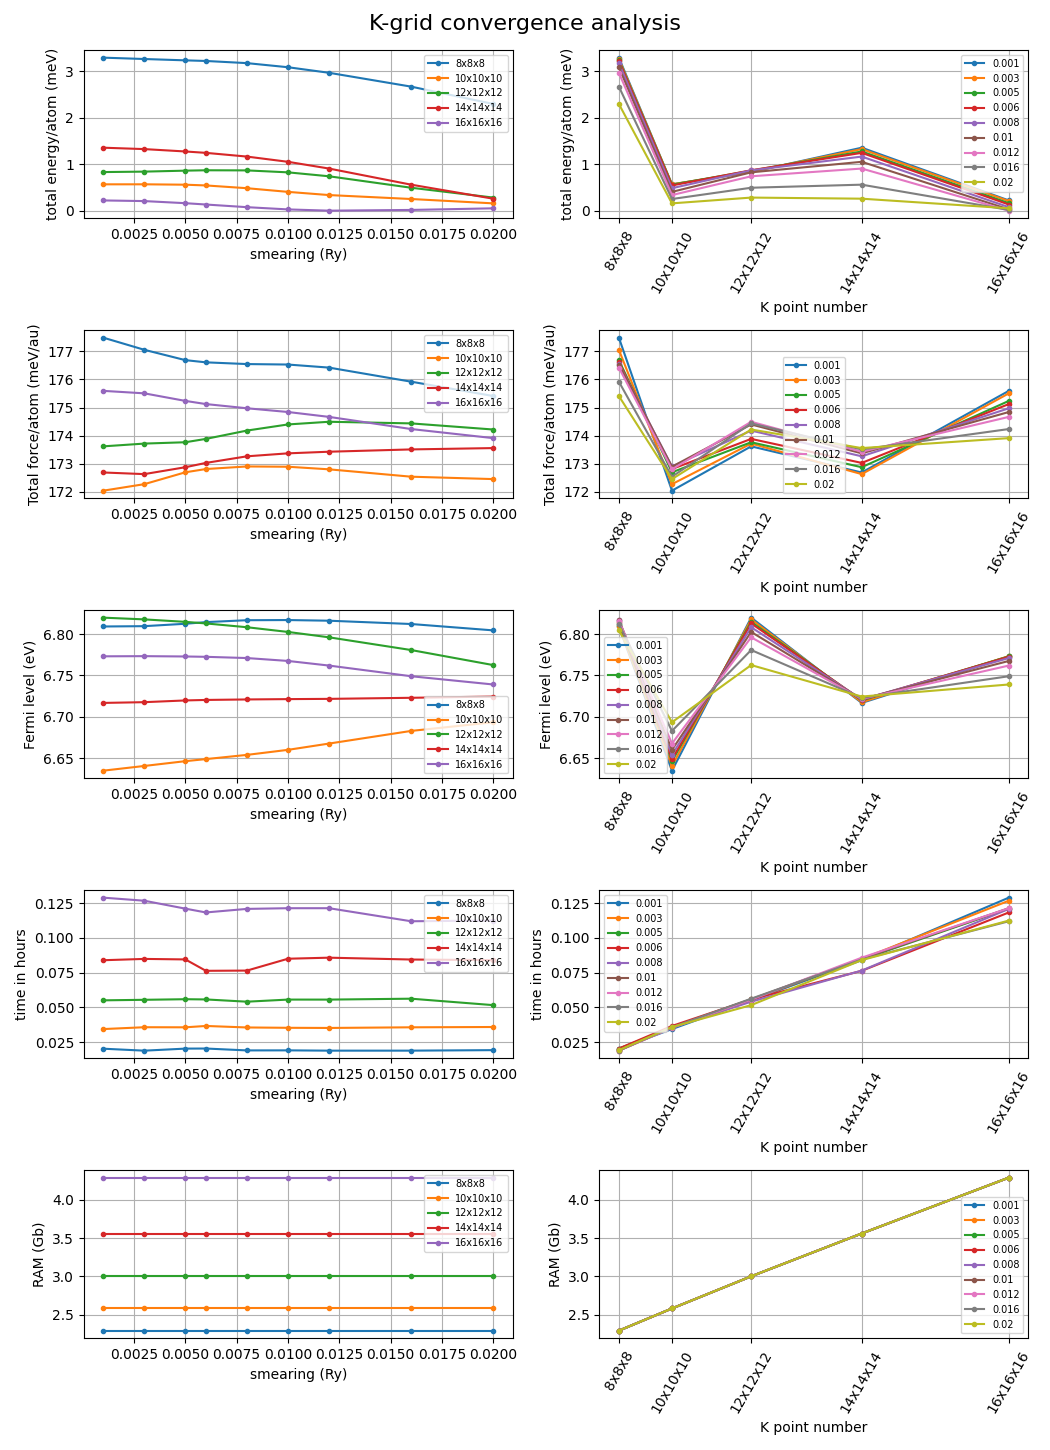

In [20]:
conv.kgrid.analysis('DATA/convergence/Kgrid/',temp=False,title='K-grid convergence analysis')

### Example with temperature

Setting the corresponding flag ```temp=True``` shows a secondary axis with the corresponding **temperature**.

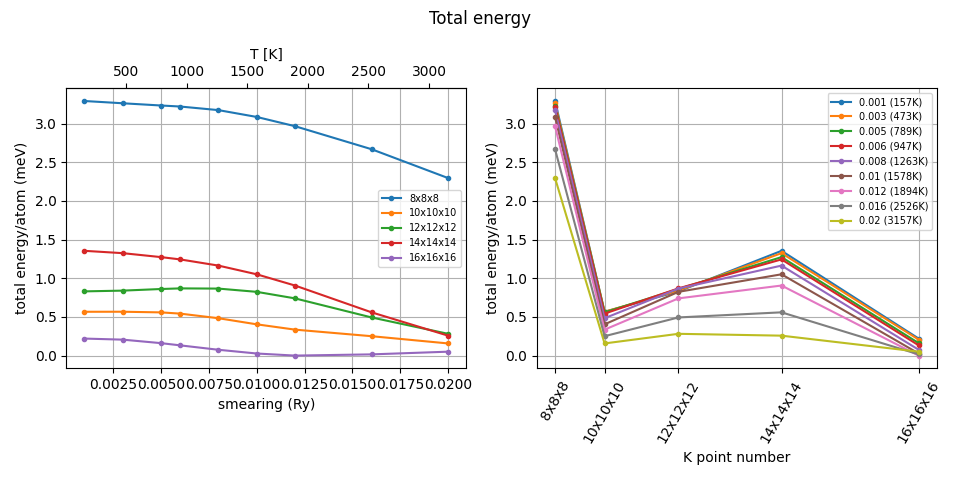

In [27]:
conv.kgrid.energy('DATA/convergence/Kgrid/',temp=True)

# **II. Phonons**

In [4]:
from yaiv import convergence as conv

Submodule with the aim of converging **phonon frequencies** respect to the **K-grid/smearing**. For the cases where the smearing has a physical value, as Fermi-Dirac smearing, it can plot a sencondary axis representing **temperature**. It has the following functions:

- **read_data:** Read the data from the corresponding folder. Then, you could make your own plots or further process the data and feed it later.
- phonons_vs_cutoff: Self-explanatory...
- phonons_vs_smearing: Self-explanatory...
- phonons_vs_Kgrid_cutoff: phonons vs Kgrids for different cutoffs.
- phonons_vs_Kgrid_smearing: phonons vs Kgrids for different smearings.
- **phonons_cutoff:** Analaysis of cutoff convergence.
- **phonons_Kgrid:** Analysis of the Kgrid convergence.

## 1. Cutoff

In this example we analyze all the frequencies, however, using the ```freqs``` flag we can focuss only up to a certain frequency (focussing on the most unstable modes).

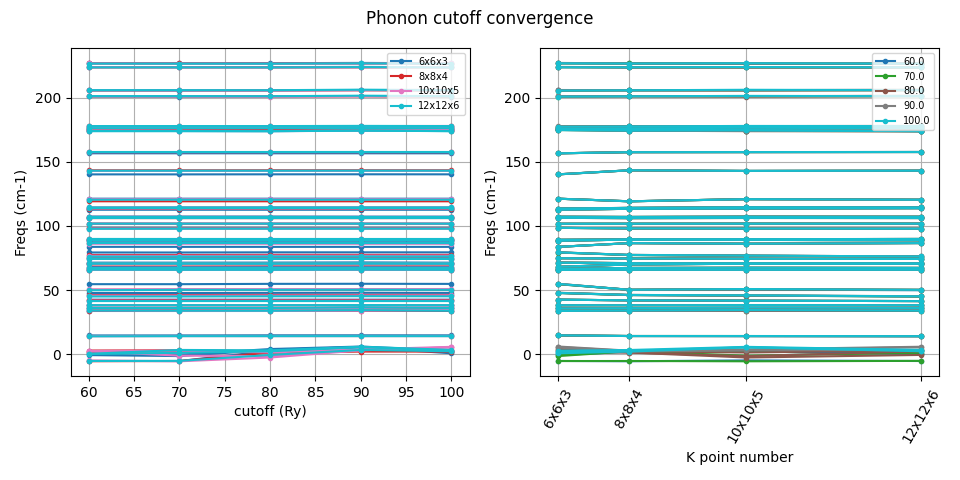

In [7]:
conv.phonons.phonons_cutoff('DATA/convergence/phonons_cut/',title='Phonon cutoff convergence')

## 2. Kgrid & Smearing

- Setting the corresponding flag ```temp=True``` shows a secondary axis with the corresponding **temperature**.
- ```freq=1``` focuses only on the most unstable frequency.

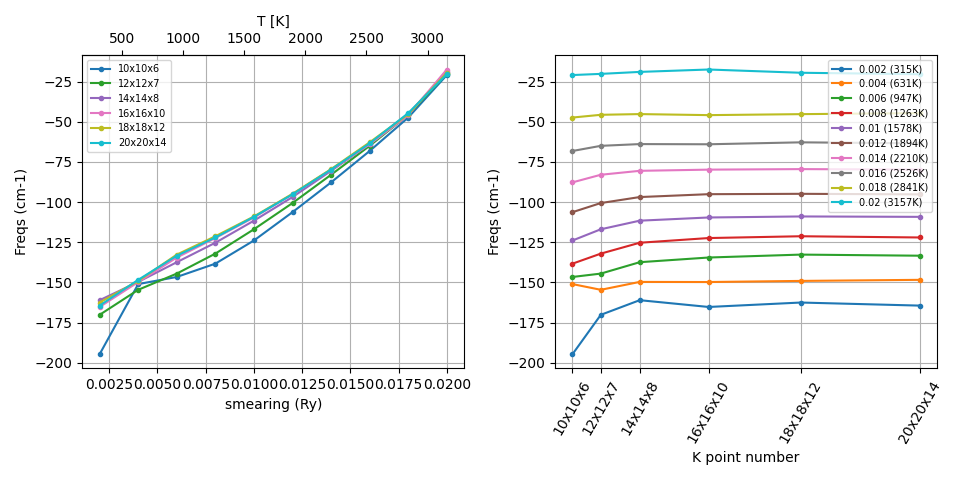

In [2]:
conv.phonons.phonons_Kgrid('DATA/convergence/phonons_Kgrid/',freqs=1,temp=True)

# **III. Wannier90**

In [7]:
from yaiv import convergence as conv

Submodule with the aim of keeping track of wannier minimzation. It has the following fuctions:
- **read_w90out:** Read the data from the corresponding .wout file. Then, you could make your own plots or further process the data and feed it later.
- w90_wannierization: Plot of the Total spread as a function of the step.
- w90_disentanglement: Plot of the disentanglement procedure.
- w90_spreads: Plot of the individual spreads of each Wannier function
- w90_centers: Plot of the $(x,y,z)$ coordinates defining all the Wannier centers. To much movement could indicate a bad choice of initial guess.
- **w90:** All the previous ones in a single figure for a complete analysis.


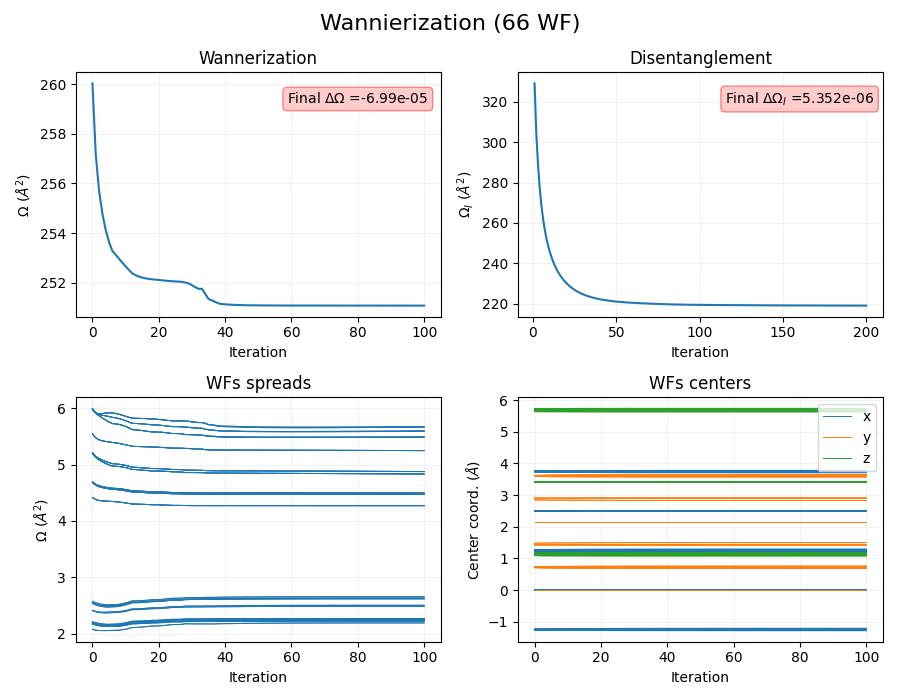

In [9]:
conv.wannier.w90('DATA/convergence/wannier90/NbGe2.wout')